# Issue 592 - Synthetic Data ERT

This notebook was made on response of a github issue for pyGIMLi.
The full issue can be found on https://github.com/gimli-org/gimli/issues/592

In [1]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
from pygimli.physics.ert.importData import importRes2dInv
from pygimli.physics.ert.importData import importAsciiColumns

(<Axes: >, None)

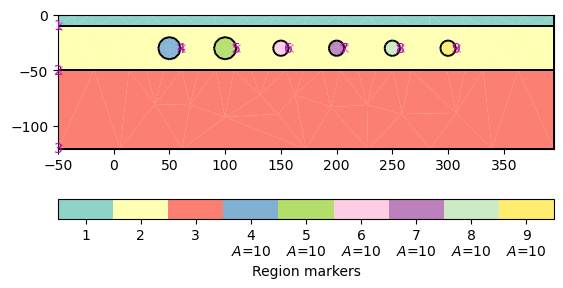

In [2]:
layers = mt.createWorld(start = [-50,0], end = [395, -120], layers = [-50, -10])
anomaly1 =  mt.createCircle(pos=[50, -30], radius = 10, area= 10, marker=4)
anomaly2 =  mt.createCircle(pos=[100, -30], radius = 10,area= 10 ,marker=5)
anomaly3 =  mt.createCircle(pos=[150, -30], radius = 7,area= 10 ,marker=6)
anomaly4 =  mt.createCircle(pos=[200, -30], radius = 7,area= 10, marker=7)
anomaly5 =  mt.createCircle(pos=[250, -30], radius = 7,area= 10, marker=8)
anomaly6 =  mt.createCircle(pos=[300, -30], radius = 7,area= 10, marker=9)

model = layers + anomaly1 + anomaly2 +anomaly3 + anomaly4 + anomaly5+anomaly6
pg.show(model)

In [3]:
elecs=np.linspace(start=0, stop=345, num=140)
elecs= np.arange(140) * 2.5
print(elecs)

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5]


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19a30f71160>)

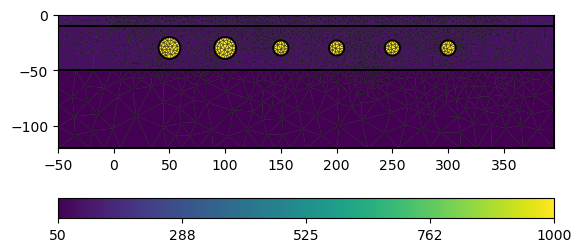

In [4]:
scheme = ert.createData(elecs, schemeName ='gr')
for el in scheme.sensors():
    model.createNode(el)
mesh = mt.createMesh(model, quality = 34)

rhomap = [[1, 100], #limonate
          [2, 90],#limonite ore
          [3, 50], #Bedrock
          [4, 1000], #Boulder
          [5, 1000], #Boulder
          [6, 1000], #Boulder
          [7, 1000], #Boulder
          [8, 1000], #Boulder
          [9, 1000]] #Boulder
pg.show(mesh, data=rhomap, showMesh=True)

Data error estimate (min:max)  0.01000030350626158 : 0.010037632654445888


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19a5e537d00>)

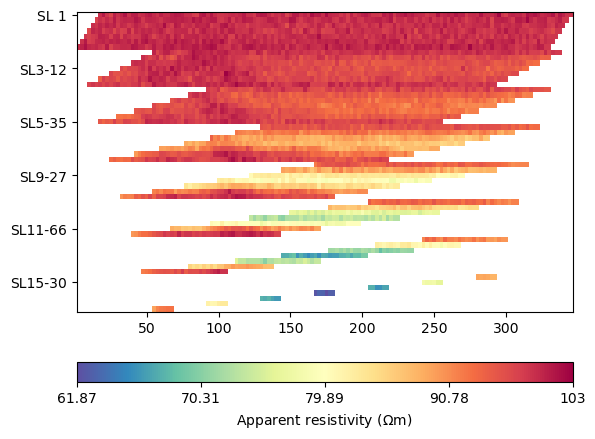

In [7]:
data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiseLevel=0.01,
                    noiseAbs=1e-6, seed=1337)
# data ['k'] =  ert.createGeometricFactors(data, numerical=True)
# data ['err'] = ert.estimateError(data, absoluteError=0.1, relativeError=0.1)
ert.show(data)

28/09/23 - 08:54:31 - pyGIMLi - INFO - Found 2 regions.
28/09/23 - 08:54:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
28/09/23 - 08:54:31 - pyGIMLi - INFO - Found 2 regions.
28/09/23 - 08:54:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
28/09/23 - 08:54:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
28/09/23 - 08:54:31 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
28/09/23 - 08:54:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 6734 Cells: 12796 Boundaries: 9932
28/09/23 - 08:54:31 - pyGIMLi - INFO - Use median(data values)=96.51434133944355
28/09/23 - 08:54:31 - pyGIMLi - INFO - Created startmodel from forward operator: 2633, min/max=96.514341/96.514341
28/09/23 - 08:54:31 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000019A3B4294F0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000019A3B4B21D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000019A3B4B2130>
min/max (data): 61.87/103
min/max (error): 1%/1%
min/max (start model): 96.51/96.51
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 45.28 (dPhi = 36.85%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.72 (dPhi = 91.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.57 (dPhi = 57.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.24 (dPhi = 20.58%) lam: 20.0
---------------------------------------------------------

28/09/23 - 08:56:37 - pyGIMLi - INFO - Saving inversion results to: .\20230928-08.56\ERTManager


('.\\20230928-08.56\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

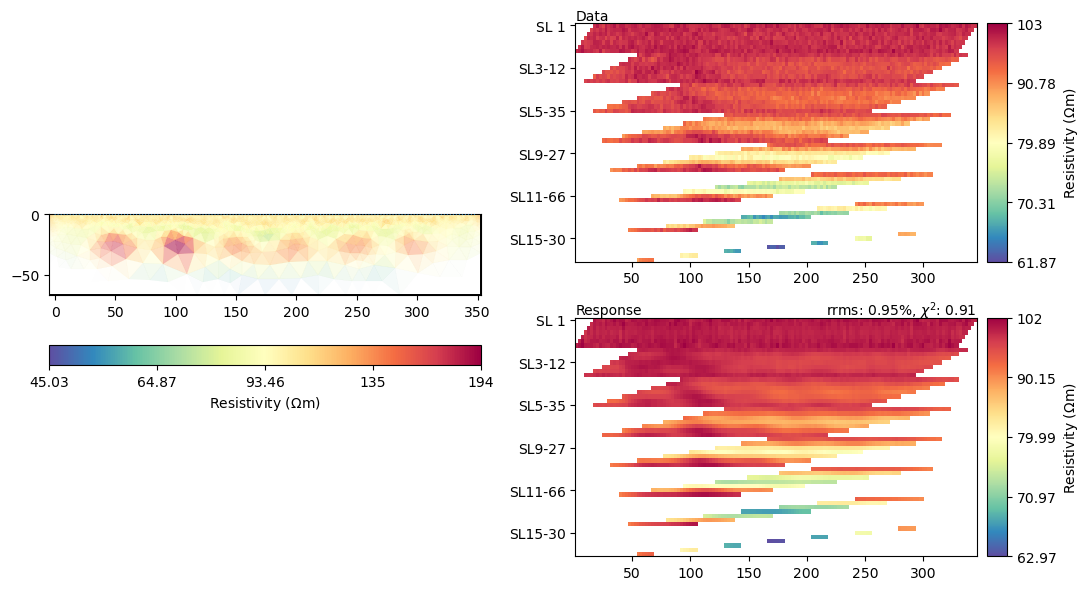

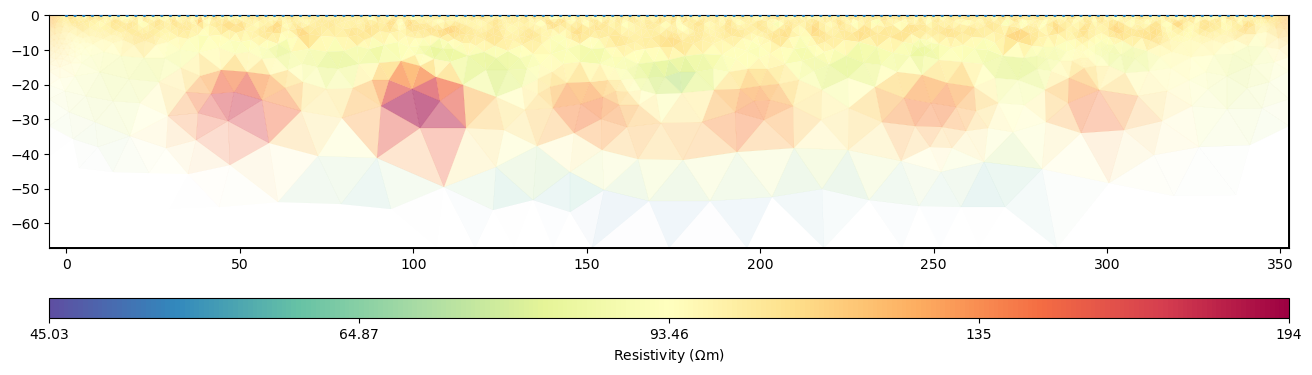

In [6]:
data.save('NO3_Syntentik.dat')
mgr =  ert.ERTManager(data, verbose = True)
inv = inv =  mgr.invert(data, lam=20, verbose=True, paraDX=1, paraDepth=67, quality = 33.6)
# mgr.showResultAndFit()
# mgr.saveResult( )

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x19a5e727bb0>)

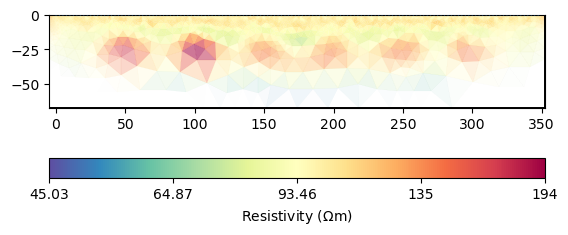

In [8]:
mgr.showResult()